In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
from scipy.stats import pearsonr
from scipy.spatial import distance
# from scipy.spatial
from scipy.stats.mstats import gmean
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess 
from skmisc.loess import loess
%matplotlib inline
from itertools import combinations
from itertools import chain
from itertools import product
import statsmodels
from sklearn.manifold import TSNE
import umap

from adjustText import adjust_text

from multiprocessing import Pool
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

# fgm_simulation_path = '/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/Simulations/FGM_simulation_callable.py'
# sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))
# from FGM_simulation_callable import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
graphs_path = '../code/graphs.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
sys.path.append(os.path.dirname(os.path.expanduser(graphs_path)))
import tools
import graphs
from tools import mutant_colorset
from tools import condition_colorset
from tools import renamed_conditions

In [2]:
fitness_data = p.read_csv('../data/fitness_weighted_allconditions_swapsremoved.csv')

sorted_m3_cols =   ['M3_Batch_23_fitness', '19_fitness', 'M3_Batch_18_fitness',
       'M3_Batch_20_fitness', 'M3_Batch_3_fitness', 'M3_Batch_13_fitness',
       'M3_Batch_6_fitness', '1BB_M3_fitness', 'M3_Batch_21_fitness']

sorted_nonm3_cols = ['1BB_1.4%Gluc_fitness', 'Ferm_44hr_Transfer_fitness',
       '1BB_1%Gly_fitness', '1BB_1.8%Gluc_fitness', '1BB_0.5%Raf_fitness',
       'Geldanamycin8.5uM_fitness', 'Ferm_40hr_Transfer_fitness',
       '1BB_Baffle_fitness', '1.5%_fitness', 'DMSO_fitness',
       '1BB_1%Raf_fitness', '1.7%_fitness', '1.6%_fitness',
       'Ferm_50hr_Transfer_fitness', '1.4%_fitness', '1BB_2ugFlu_fitness',
       'Ferm_54hr_Transfer_fitness', 'Resp_3Day_Transfer_fitness',
       '1BB_17uMGdA_fitness', '1.8%_fitness',
       'Resp_24hr_Transfer_fitness', '1BB_1%EtOH_fitness',
       '1BB_8.5uMGdA_fitness', '1BB_SucRaf_fitness', '2.5%_fitness',
       'Resp_4Day_Transfer_fitness', 'Resp_5Day_Transfer_fitness',
       '1BB_0.2MNaCl_fitness', '1BB_0.2MKCl_fitness',
       '1BB_0.5ugFlu_fitness', 'Ben0.4_fitness', 'Ben2_fitness',
       'Resp_6Day_Transfer_fitness', 'Resp_7Day_Transfer_fitness',
       '1BB_0.5MKCl_fitness', '1BB_0.5MNaCl_fitness']

first_nonsubtle = 16


There are two things we can do to assess how robust the conclusion that the extra 5 components represent real signal.

(1) We can permute the values of all the mutants (and conditions?) in the 5-9 components. If it's true that just having extra dimensions to play with increases predictive power, then there should be an improvement in the new conditions here.

(2) We can change the specific mutants that are in our training and testing sets - if this structure is specific to these mutants, then the signal we see should change. Similarly, we can slightly alter the composition of these sets (slightly more or fewer mutants per gene) to see if this qualitatively changes our results.

## Permuting latent components

3 10 0.08333333333333333
1 0.5144058589626987
2 0.740575920697617
3 0.739821326507683
4 0.7517886811233357
5 0.7506156990261361
6 0.7675422470440669
7 0.7774856649279136
8 0.8255728685636463
9 0.8105048491044577
10 0.8143671582478542
11 0.8006294236583402
12 0.7923038184563151
13 0.7908101053755604
14 0.7787684294001684
15 0.7493841269061344
16 0.6921443595809239
17 0.6703097471025194
18 0.6651112110393057
19 0.636272827135896
20 0.6249953157079307
21 0.5213680302781685
22 0.45141516083042854
23 0.35418571455661985
24 0.2867486068891387
25 0.17546179264558126
0.0003819793985842491 0.0002703306964100823 0.7077101472278966
9
1 0.4745371700432195
2 0.7323908256411356
3 0.7378161781149942
4 0.7345928627889295
5 0.73825849825225
6 0.7529950786953261
7 0.7750125124841301
8 0.7773982950864382
9 0.7809727015504844
10 0.7690657903812919
11 0.7708544138383953
12 0.8078227648980928
13 0.8104037088039462
14 0.7543490562780916
15 0.7461361320529607
16 0.6854219973786355
17 0.6263076025339245
18 0.6

15 0.7930170267862529
16 0.7989059256292977
17 0.7975612466100674
18 0.790427523511076
19 0.7918244932141215
20 0.7691440518770218
21 0.7509188433758522
22 0.7498595542053195
23 0.7432855434048053
24 0.7319114154714383
25 0.7279563172939175
0.00035245391181099766 0.00027004956456287504 0.7661982333386281
9
1 0.5191266247308708
2 0.754492601299783
3 0.7667976388900423
4 0.7687871347865772
5 0.7664245375184718
6 0.7393848069689128
7 0.7999787730189076
8 0.791296581758418
9 0.7894815151675945
10 0.782671613783602
11 0.7919473463517978
12 0.783850288799411
13 0.7775127884831505
14 0.7764564400708932
15 0.7610994708279901
16 0.7420177905043259
17 0.726329561862085
18 0.7161197088300142
19 0.7138000126013198
20 0.6886210007305176
21 0.6517880940914954
22 0.6478471641441912
23 0.5851040840416615
24 0.5741206117501219
25 0.5847385272887946
0.00036321641977086436 0.0002570830250125013 0.7077957135712161
9
1 0.5198293899370715
2 0.7204908726343271
3 0.6939217227479587
4 0.6875175296937845
5 0.69

1 0.4982581596347144
2 0.7154959168893116
3 0.7018001267243219
4 0.7097309498516815
5 0.7173942578524077
6 0.7433468732307303
7 0.7811461786996853
8 0.8074913352686748
9 0.8004744141395003
10 0.8019467190808243
11 0.7956417610810941
12 0.8001286381987076
13 0.7939969064410715
14 0.7810187623648722
15 0.761342106932492
16 0.6874969536001069
17 0.6911859176510635
18 0.6850979338390291
19 0.6764908548776952
20 0.6769510990176475
21 0.6493515374690788
22 0.620593989560988
23 0.5938704928629923
24 0.3108124868847437
25 -4.3834900608673
0.00042586100299993746 0.00029693726045280775 0.6972633285533575
9
1 0.47101443507267715
2 0.7141630115590877
3 0.7161050173233947
4 0.7297072766094095
5 0.7263800013179222
6 0.7378516290445638
7 0.7584116134881118
8 0.7950197412004623
9 0.8025803806873919
10 0.7724365840969161
11 0.7431495359165663
12 0.7418700386426546
13 0.6865161523964137
14 0.6830588659439001
15 0.6284007196301429
16 0.568885164691386
17 0.5748676588258074
18 0.49617970685121027
19 0.414

0.0003689176247122414 0.0002825451700361422 0.7658760414510682
9
1 0.514882904454036
2 0.6949908401181443
3 0.7001328340336186
4 0.7188941284325359
5 0.6964185744417601
6 0.7190495074925163
7 0.7066436126456876
8 0.7384323241038181
9 0.7403315094325355
10 0.7397173589878347
11 0.74132236364093
12 0.7343510180737642
13 0.7165302256822602
14 0.7193788845344413
15 0.611032329233278
16 0.5948174829220835
17 0.5911179536041804
18 0.5860123376228319
19 0.6318979634466749
20 0.619623836135046
21 0.616684064929122
22 0.5952080306605398
23 0.37079447046949676
24 0.3101768460440183
25 0.22572188219260925
0.00039778231588060076 0.00027704991485829597 0.6964862534046282
9
10 10 0.6666666666666666
1 0.5347848365081895
2 0.7750918853535254
3 0.7831013098467902
4 0.7757822942473671
5 0.764332092551845
6 0.7847044256927507
7 0.819251125539683
8 0.8245642596664073
9 0.8340205691133866
10 0.8333018141951546
11 0.8385909054273566
12 0.835817673072015
13 0.8351613249311198
14 0.8202524140698517
15 0.81257

15 0.7881994010176288
16 0.7836738780734618
17 0.7741370377486041
18 0.7609527347459906
19 0.7368229179619906
20 0.7361563356215313
21 0.7290769403491297
22 0.6712549680351468
23 0.633925037607959
24 0.5976685191382503
25 0.08786206687196252
0.000372491210041032 0.0002646968187991055 0.71061225517227
9
1 0.5177480718135663
2 0.7678190572402019
3 0.7674940033334973
4 0.7731235948568437
5 0.775670683389522
6 0.7886460960212431
7 0.830592887420637
8 0.8281564490371794
9 0.833725473039838
10 0.8184450265075005
11 0.8070599013080899
12 0.7874924759657419
13 0.7884669124241535
14 0.7645160908445572
15 0.7645780755108946
16 0.7539581058215025
17 0.6995210849564721
18 0.6945927951190498
19 0.6617517549782023
20 0.6693579913080677
21 0.6747626782186676
22 0.6319057591309214
23 0.6133580503750854
24 0.5691067099190565
25 0.5428359520557386
0.0003542033252220109 0.0002611589141057243 0.7373135583694271
9
1 0.5106413811609711
2 0.7377899093560827
3 0.71229952503495
4 0.6904791239139726
5 0.7391577

15 0.8258678997633719
16 0.8130917752757849
17 0.8065455715748469
18 0.8030859745195985
19 0.8088647599040774
20 0.7817753526438418
21 0.7796054702016596
22 0.7767166139450454
23 0.7360065364968592
24 0.7233191420757386
25 0.6509165249397956
0.00035744898148423905 0.00026212179918996766 0.7333124802917513
9
1 0.5071938684553547
2 0.7287053099327936
3 0.7238708741206832
4 0.7132161024918495
5 0.6879084714722618
6 0.7166046898645686
7 0.7269063718695844
8 0.7969721547394555
9 0.7894490646374221
10 0.7913883548483125
11 0.7943248326678963
12 0.7923896586227517
13 0.7934349668831966
14 0.793858997263373
15 0.7982062996642415
16 0.8005828233958703
17 0.7810440382350113
18 0.7442340346827447
19 0.73700306118341
20 0.7415655353004511
21 0.7506625523938824
22 0.7495729389488328
23 0.6178507394876658
24 0.6186108528267878
25 0.6024254163486915
0.0003859620133342615 0.0002867748002721368 0.7430130177701612
9
1 0.4855388066860419
2 0.7512489784358208
3 0.759974858473252
4 0.7635218042268194
5 0.7

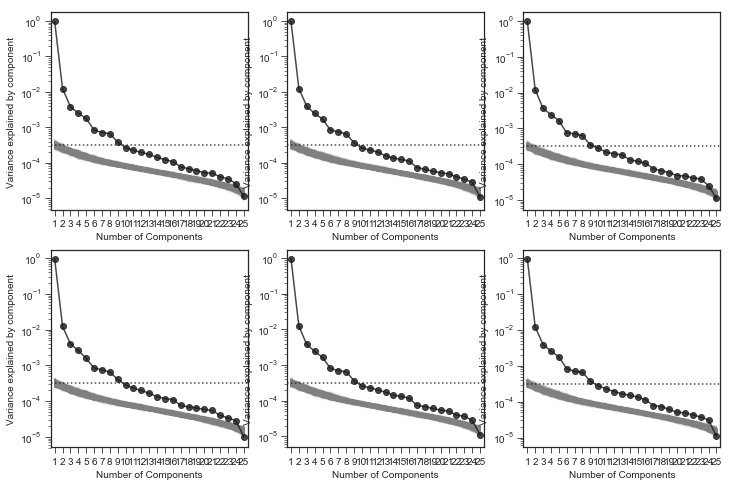

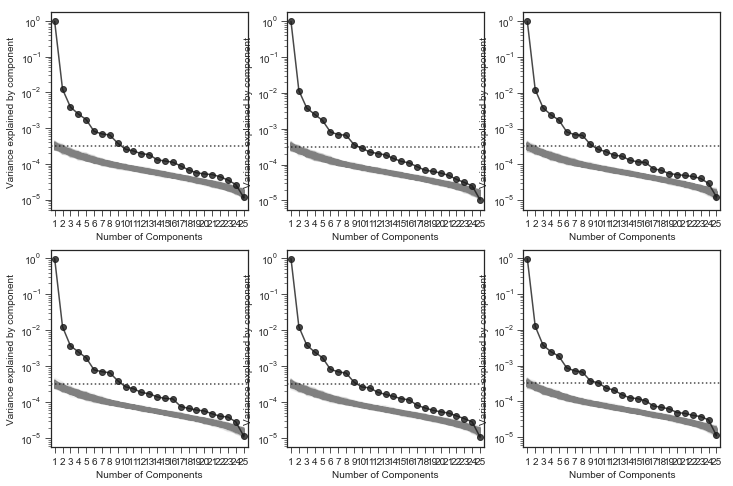

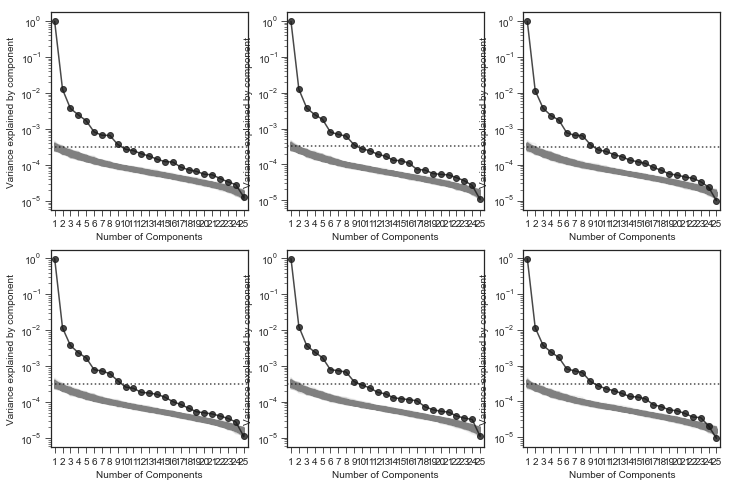

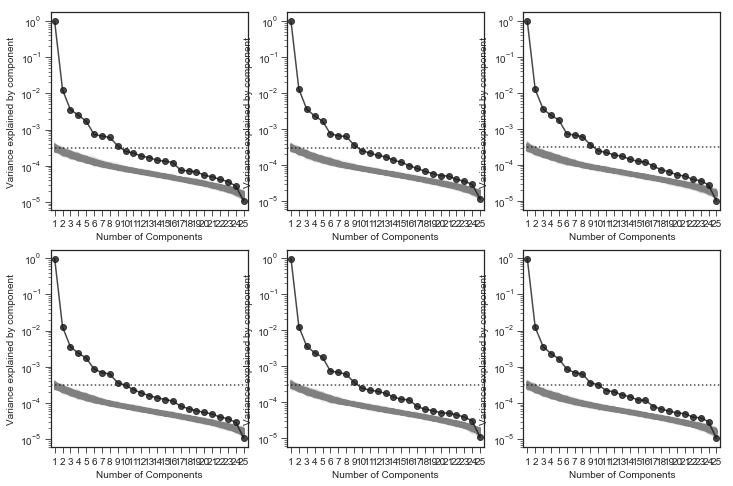

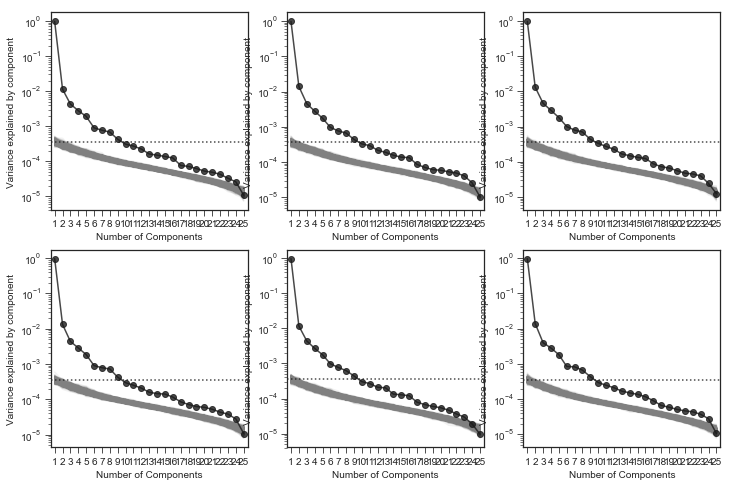

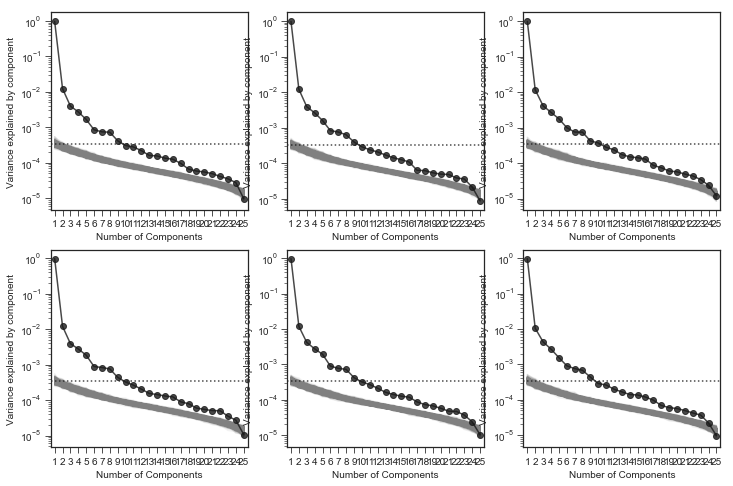

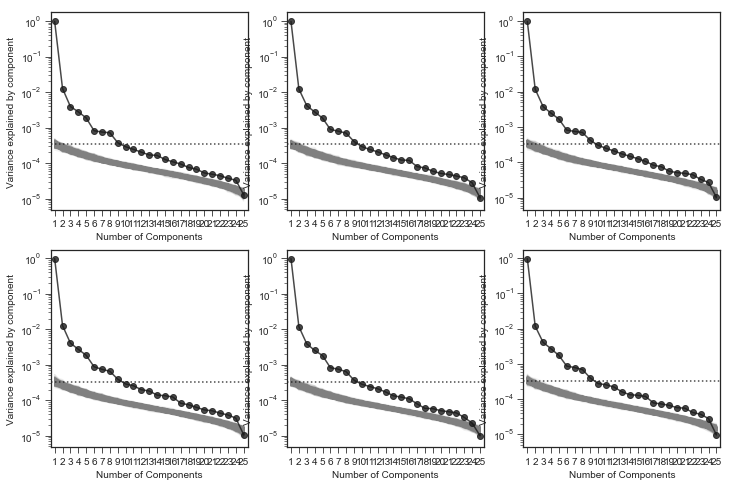

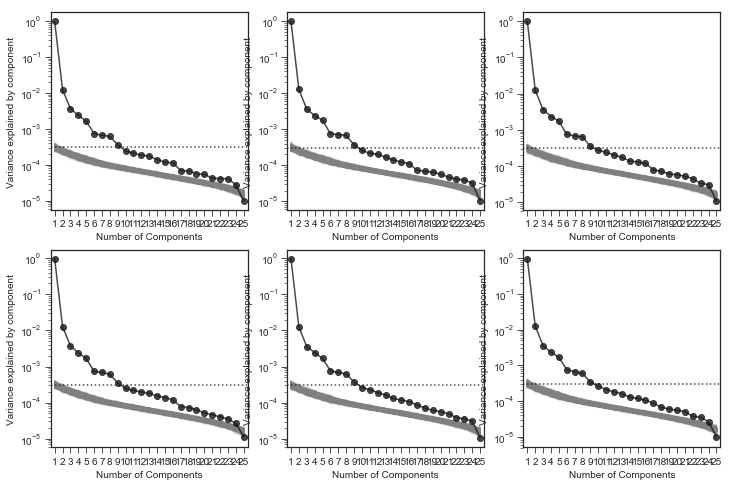

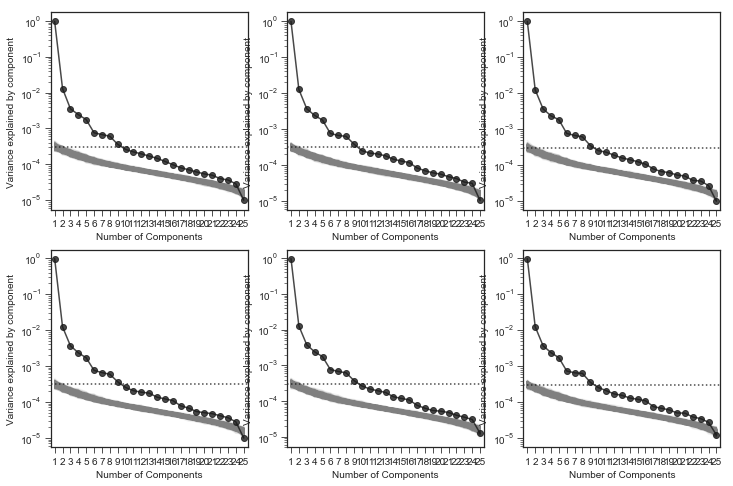

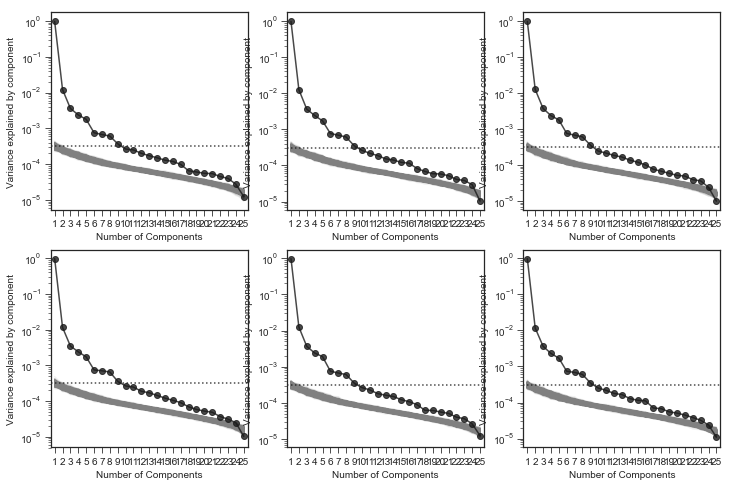

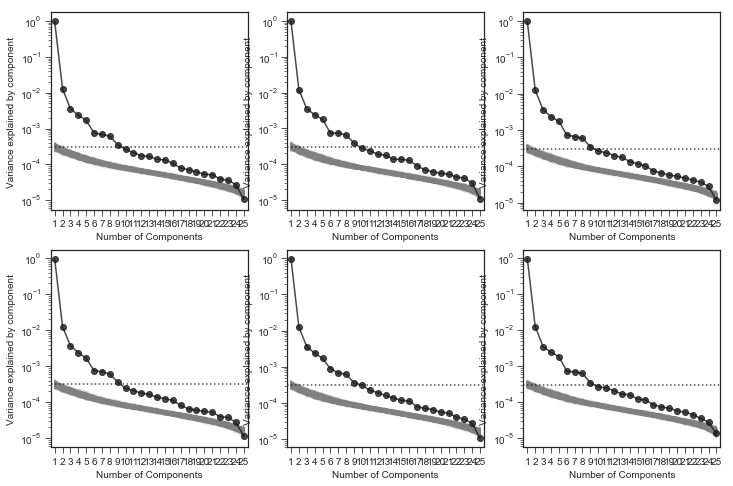

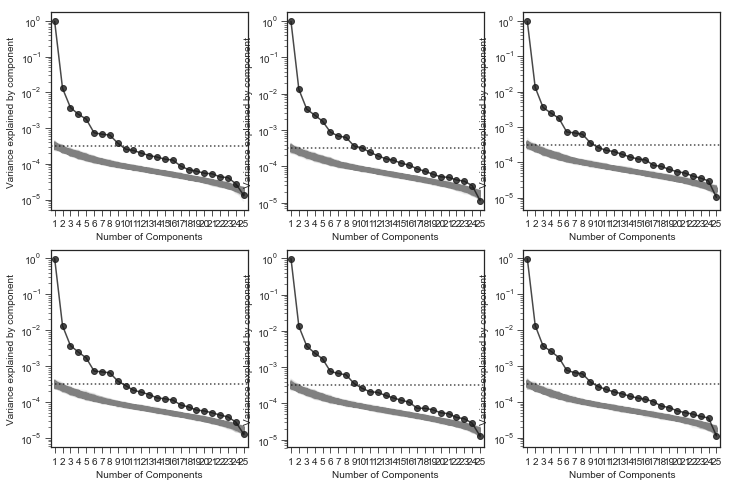

In [114]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')

datasets = {}


gene_list = ['IRA1_nonsense','GPB2','PDE2','Diploid','ExpNeutral']

n_trials = 6

# param_list = [(4,10),(3,10),(5,10),(4,5),(3,5),(5,5),(4,15),(3,15),(5,15)]
param_list = [(3,10),(4,10),(5,10),(10,10),(3,5),(4,5),(5,5),(10,10),(3,15),(4,15),(5,15),(10,15)]



for m,(max_train,max_test) in enumerate(param_list):
    print(max_train,max_test,((m+1)/(len(param_list))))
    
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    plt.title(f'{(max_train,max_test)}')
    
    datasets[f'{(max_train,max_test)}'] = {}
    
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
#         max_train = 4
#         max_test = 10

        training_bcs, testing_bcs = tools.select_train_test_mutants(this_data,max_train=max_train,max_test=max_test)

        datasets[f'{(max_train,max_test)}'][i] = tools.situate_data(this_data,list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle]),list(sorted_nonm3_cols[first_nonsubtle:]),
                      training_bcs,testing_bcs,gene_list,fixed_mutant_sets=True)


        these_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])

        this_fitness = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][these_cols].values

        this_error = this_data[this_data['barcode'].isin(list(training_bcs)+list(testing_bcs))][[col.replace('_fitness','_error') for col in these_cols ]].values

        tools.svd_noise_comparison_figure(ax,this_fitness,this_error,1000,yscale='log')

#     plt.savefig('')


([<matplotlib.axis.XTick at 0x188dfb5c0>,
 <a list of 12 Text xticklabel objects>)

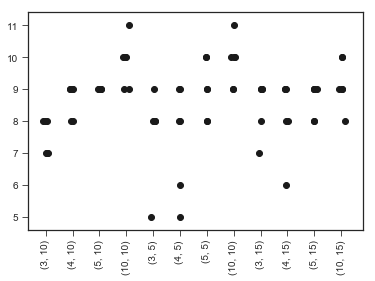

In [116]:
plt.figure()

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
    
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        plt.scatter(tools.jitter_point(m,0.05),model+1,color='k')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    

([<matplotlib.axis.XTick at 0x1235e8278>,
 <a list of 12 Text xticklabel objects>)

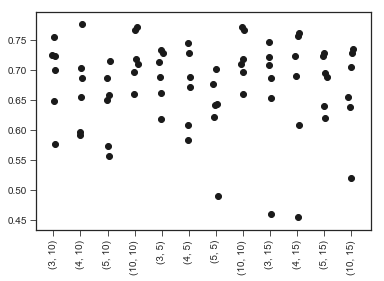

In [115]:
plt.figure()

for m,(max_train,max_test) in enumerate(param_list):
    for i in range(n_trials):
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
     
        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']


        types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

        new_mut_locs = dataset['mut_locs'][model][test[1]]

        old_cond_locs = dataset['cond_locs'][model][train[0]]

        new_cond_locs = dataset['cond_locs'][model][test[0]]

        these_sigmas = dataset['dimension_weights'][model]
        these_sigmas = these_sigmas[:model+1,:model+1]

        nonsubtle_fit = tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                      np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types)[0]

        plt.scatter(tools.jitter_point(m,0.05),nonsubtle_fit,color='k')
    
plt.xticks(range(len(param_list)),[str(item) for item in param_list],rotation=90)
    
    

4 0.6995003277918794
9 0.6907695310957808
4 0.6938394713825398
9 0.6903173952584878
4 0.685114357622292
9 0.7039430790086909
4 0.5375155148999242
9 0.620234789563438
4 0.6875746975962318
9 0.7309455156399587
4 0.6762901634532403
9 0.7090805537247679
4 0.7075126835406851
9 0.7071943399838247
4 0.685257254593292
9 0.7357175487773939
4 0.6795456309336492
9 0.7222714925432252
4 0.5819625903477103
9 0.6385251191592767


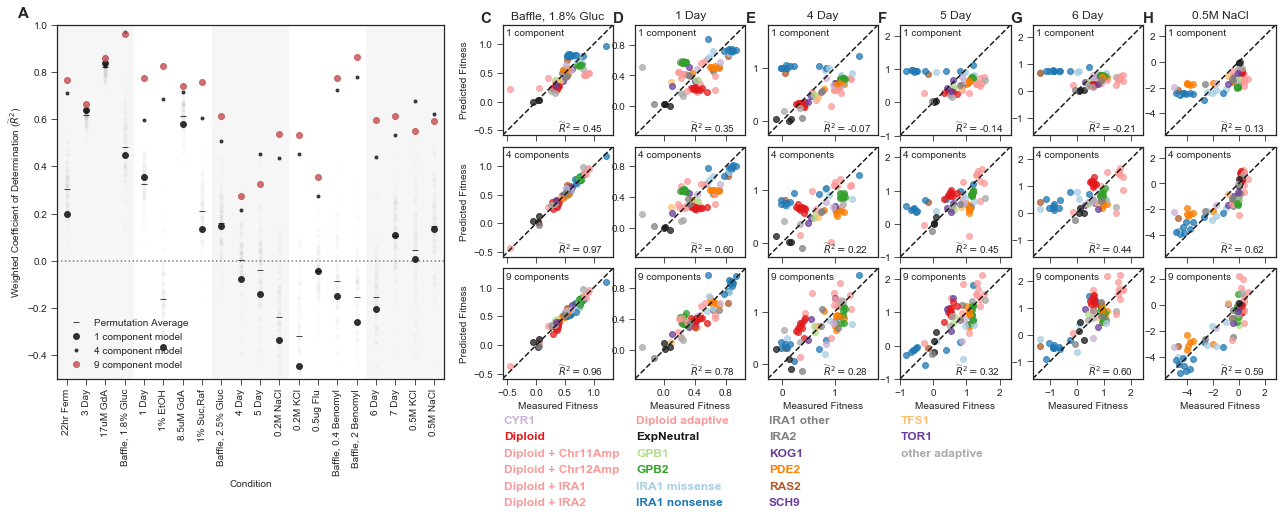

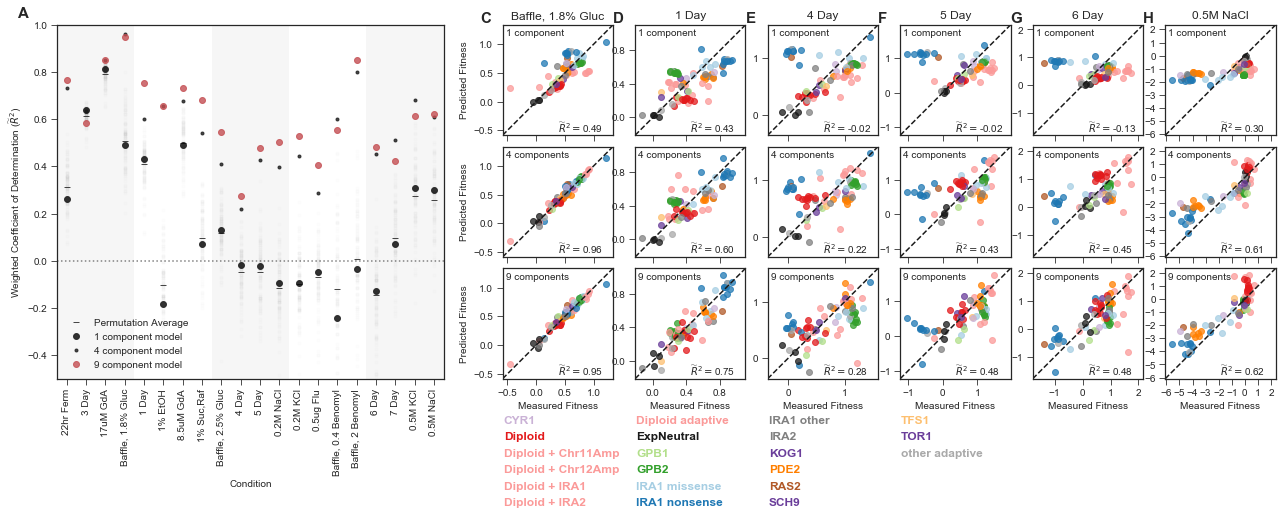

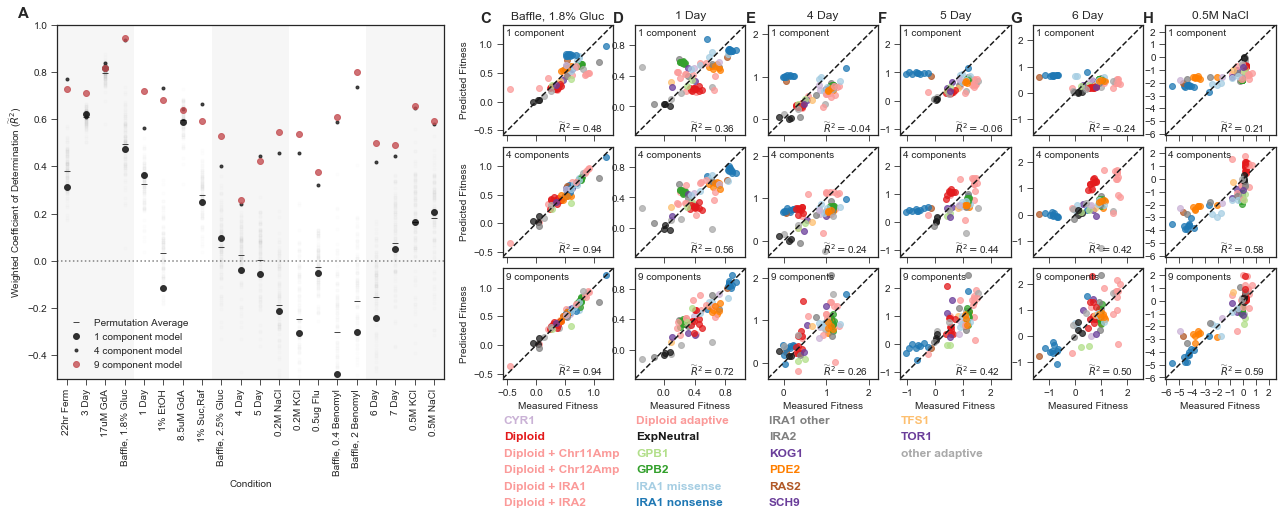

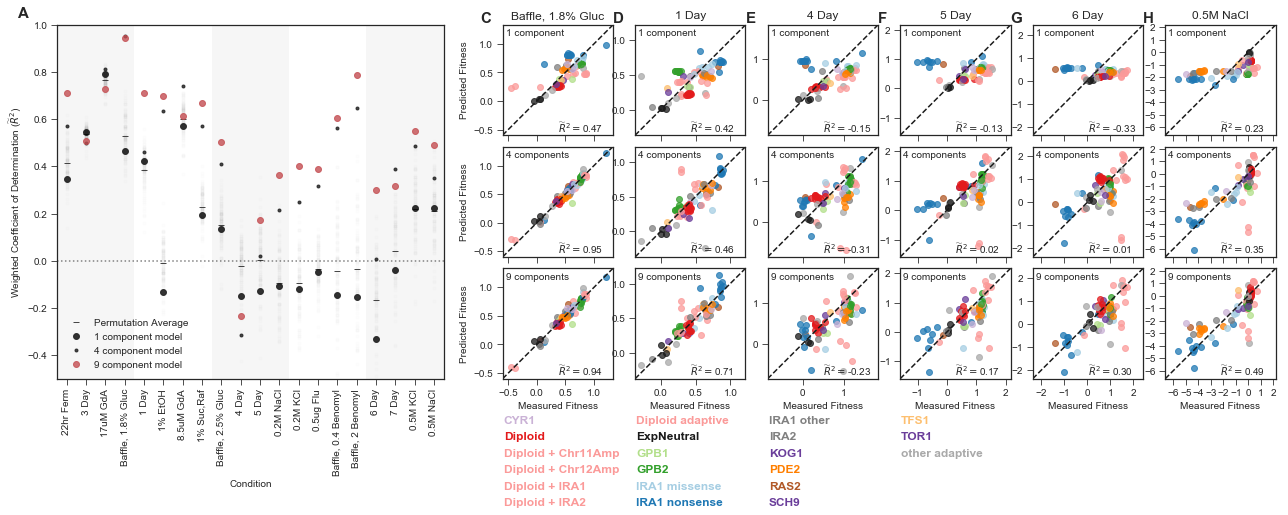

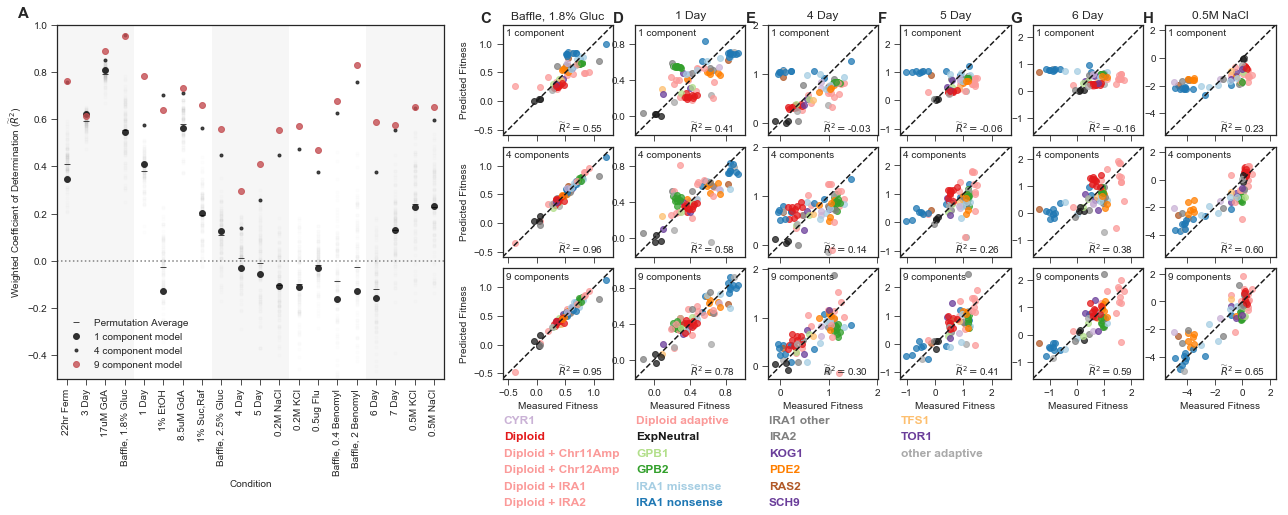

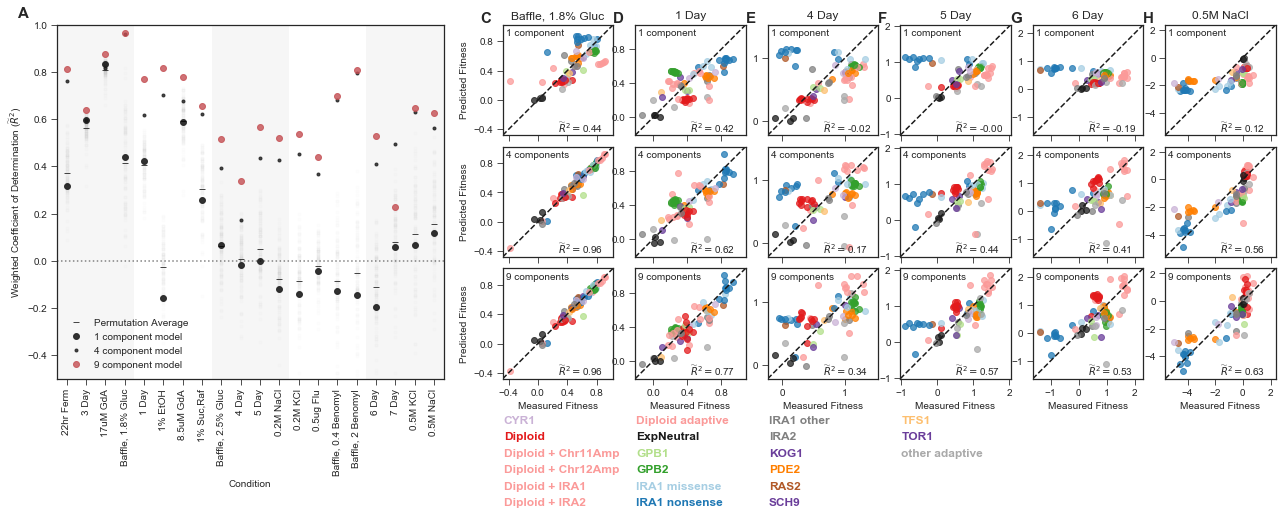

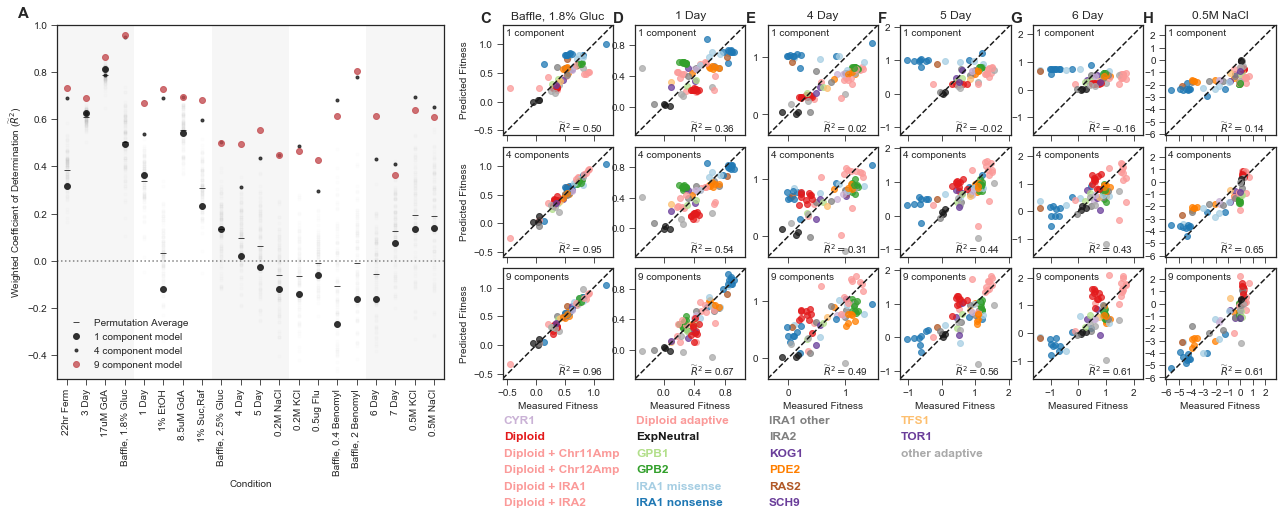

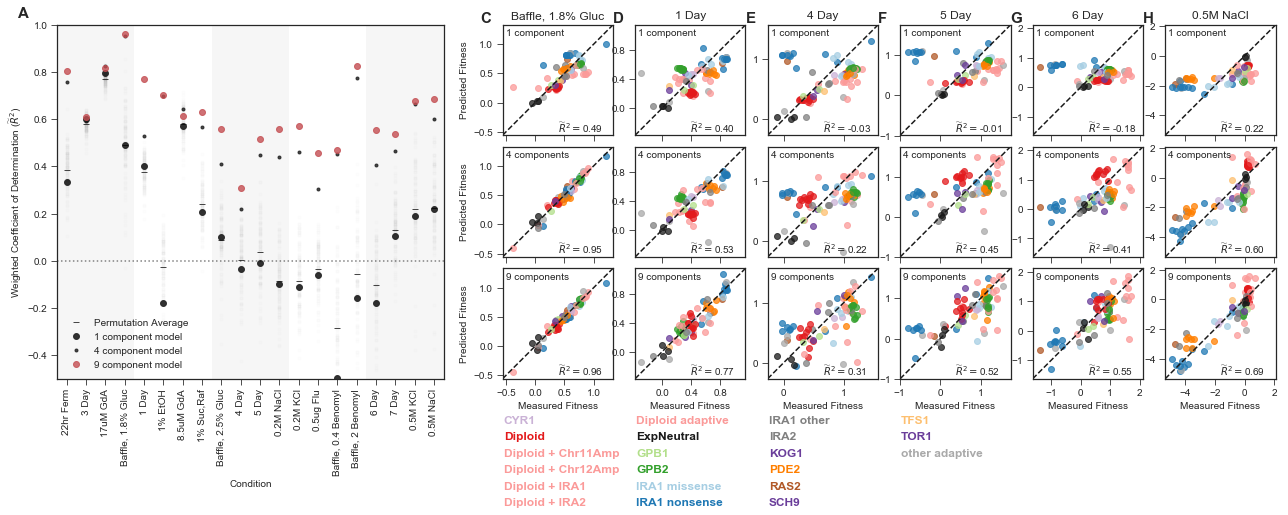

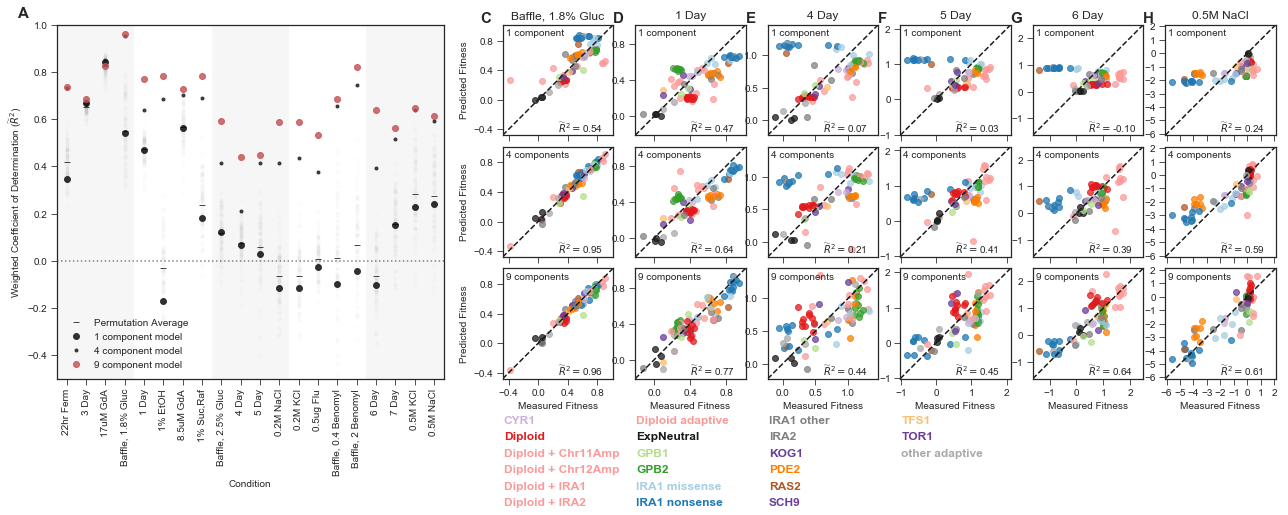

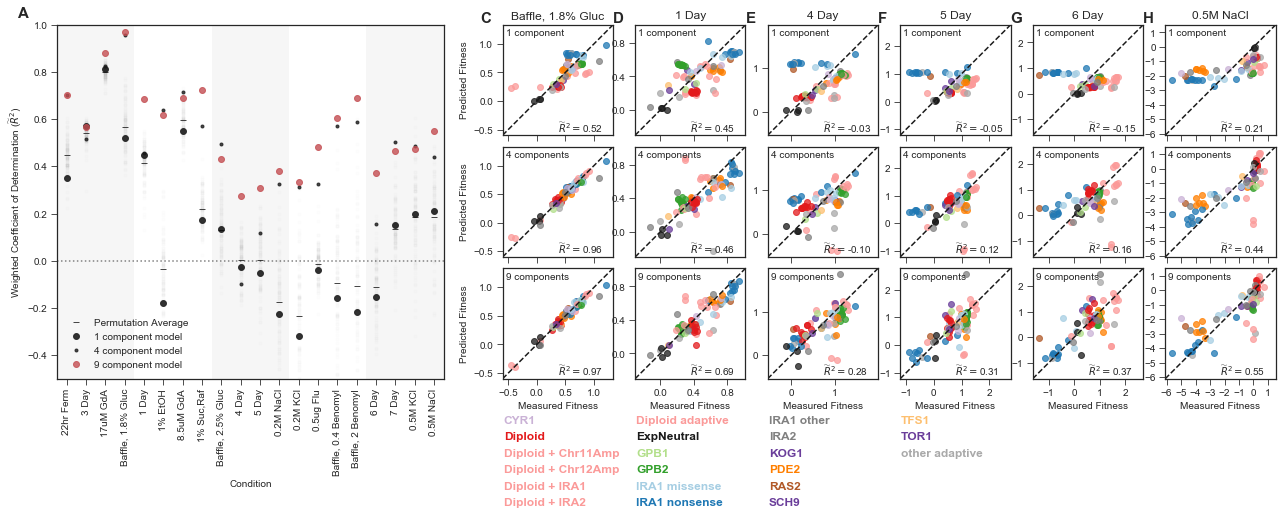

In [10]:
for i in range(n_trials):
#     example_names = ['1.8%','Resp_24hr_Transfer','1BB_1%EtOH','Ben2','1BB_0.5MNaCl']
#     # graphs.Figure4_w_examples(datasets['batch_to_nonbatch_wothers_fixed_mutants'],gene_list,this_data,[col + '_fitness' for col in example_names],model=4)
#     interesting_conditions = ['Resp_24hr_Transfer_fitness','1BB_SucRaf_fitness','2.5%_fitness','Resp_4Day_Transfer_fitness', '1BB_0.5ugFlu_fitness','Resp_6Day_Transfer_fitness']
#     example_names = ['1.8%','Resp_24hr_Transfer','1BB_SucRaf','2.5%','Resp_4Day_Transfer', '1BB_0.5ugFlu','Resp_6Day_Transfer','1BB_0.5MNaCl']
    example_names = ['1.8%','Resp_24hr_Transfer','Resp_4Day_Transfer','Resp_5Day_Transfer','Resp_6Day_Transfer','1BB_0.5MNaCl']
    
    graphs.Figure4_w_examples(datasets[i],gene_list,this_data,[col + '_fitness' for col in example_names],models=[3,8],weighted=True)
# plt.savefig(f'Figure4_with_prediction_examples_unweighted.pdf',bbox_inches='tight')

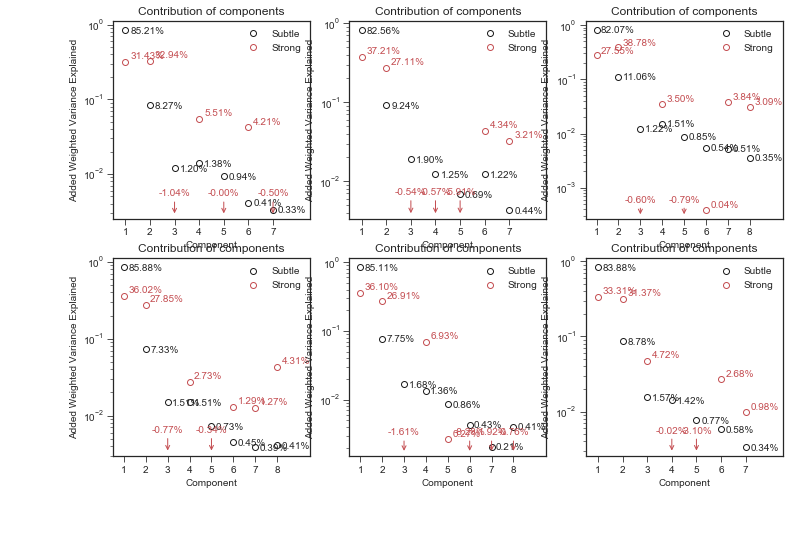

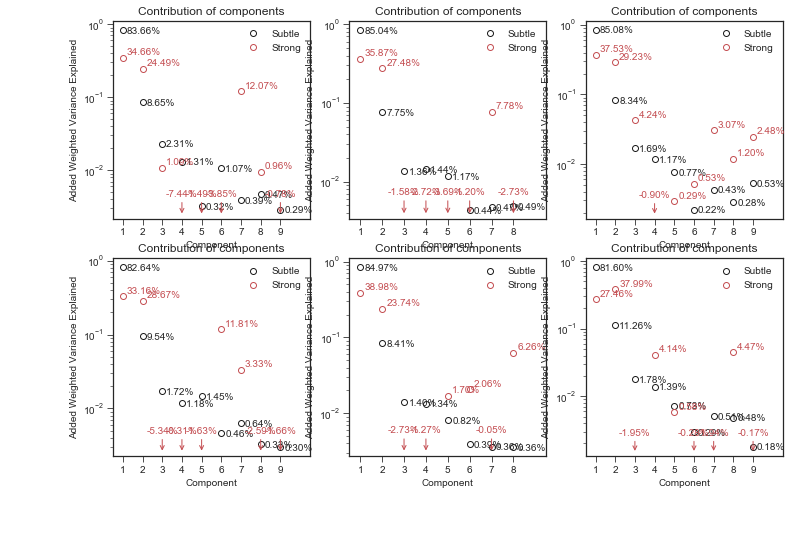

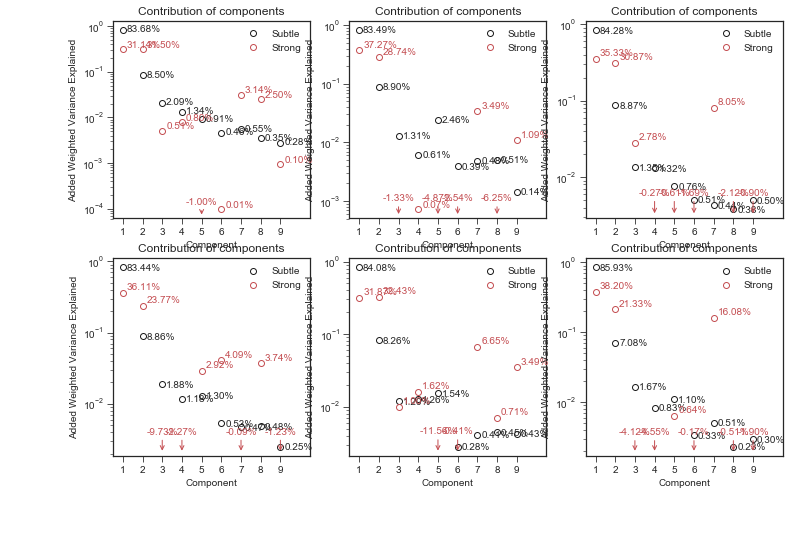

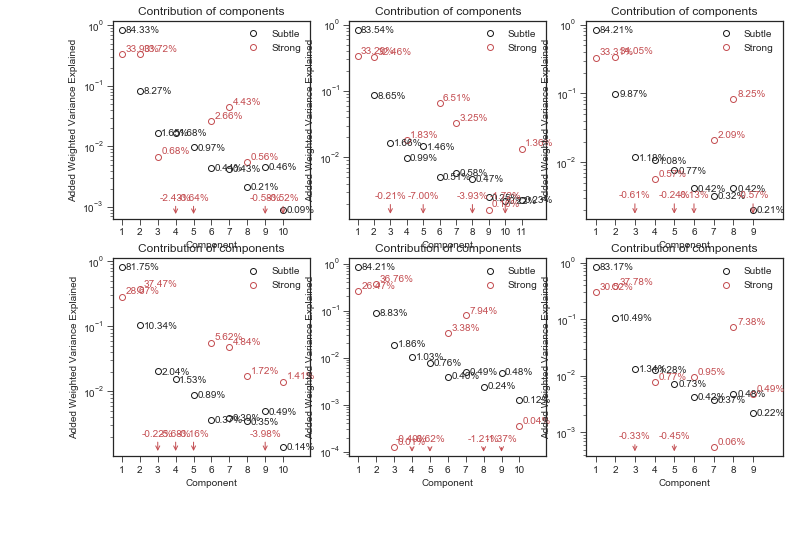

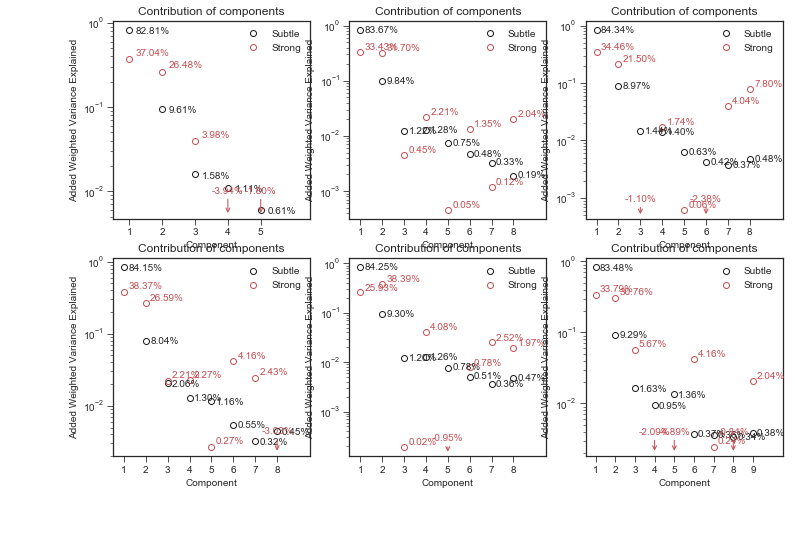

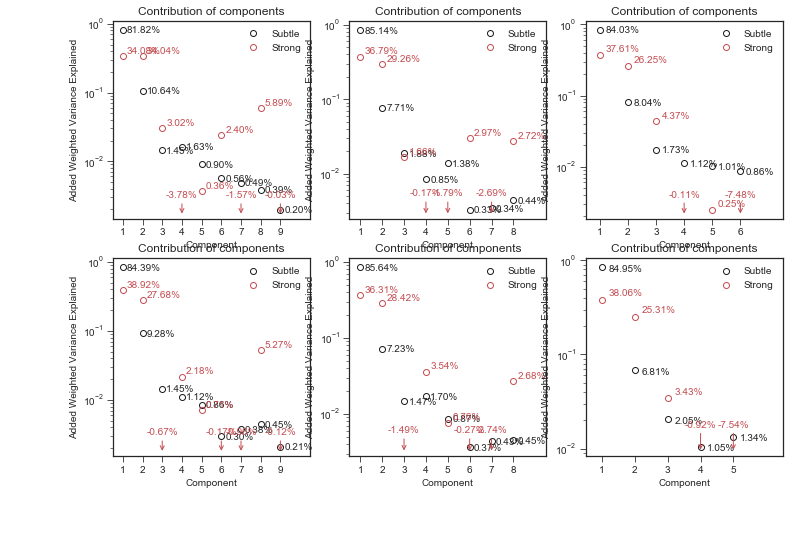

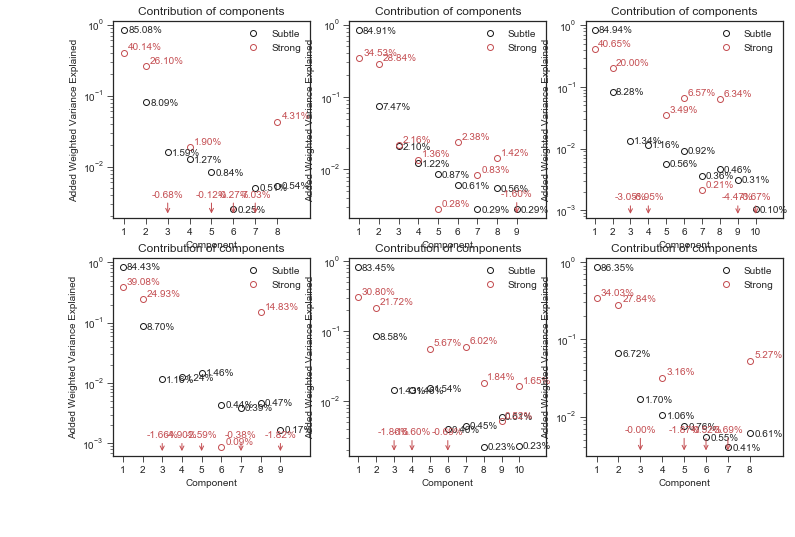

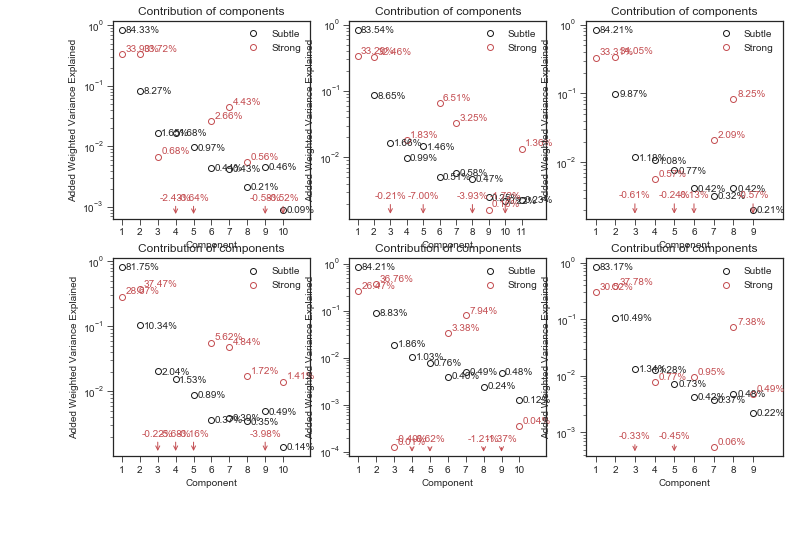

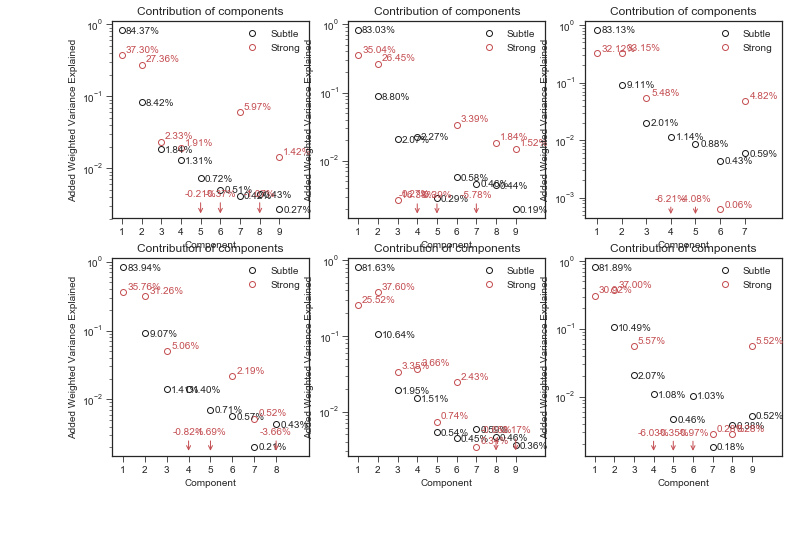

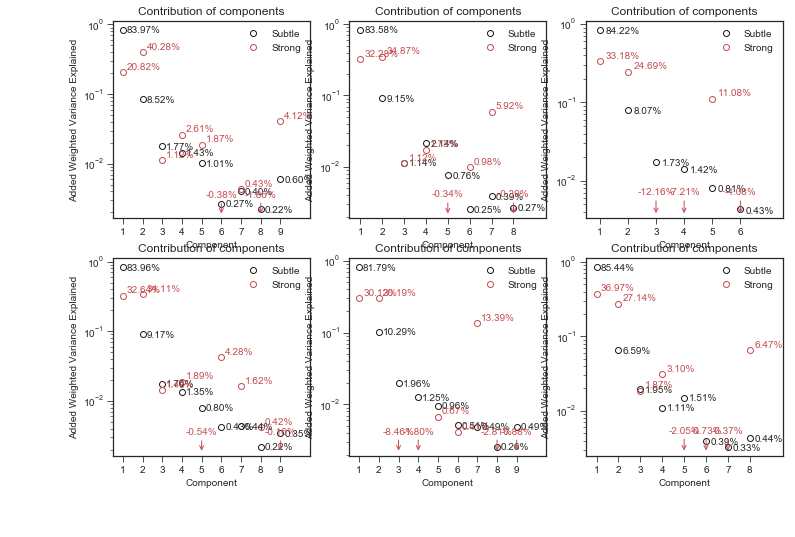

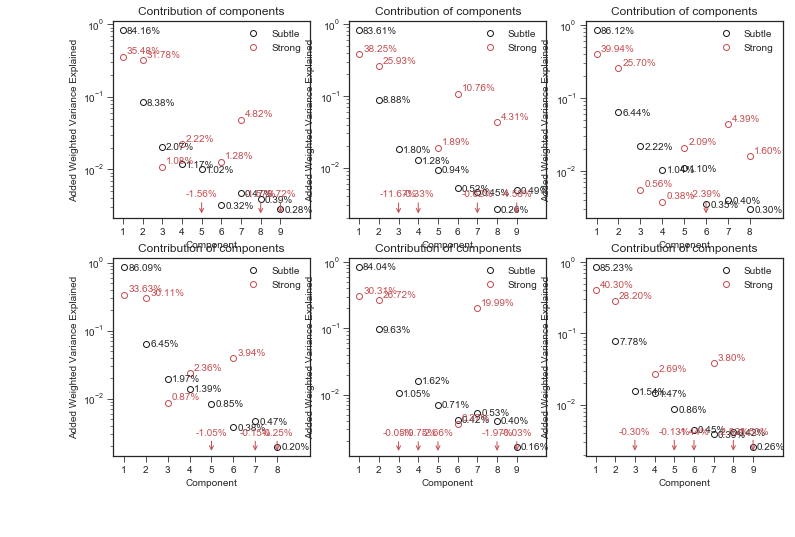

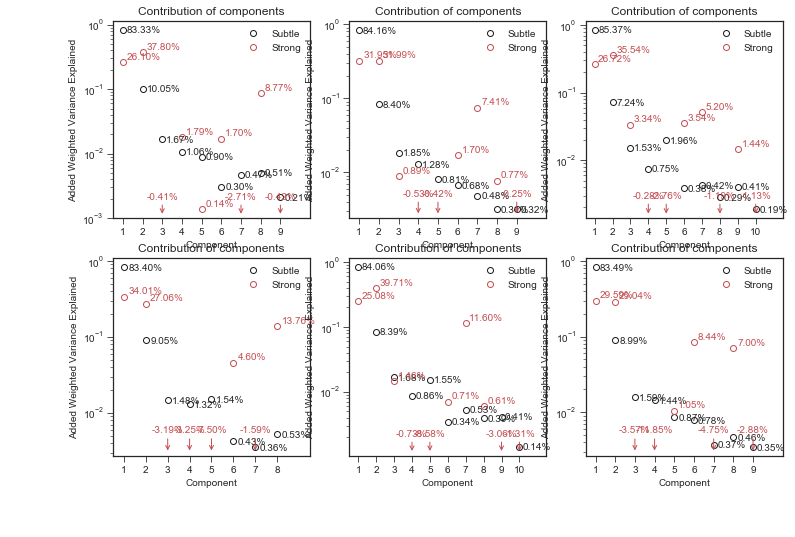

In [117]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')


ns_fits = {}
s_fits = {}

for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    
    ns_fits[f'{(max_train,max_test)}'] = {}
    s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        
        dataset = datasets[f'{(max_train,max_test)}'][i]
        n_perms = 100
        weighted= True
        ymax = 1.0
        ymin = -1.0

        all_guesses = dataset['CV_all_guesses']
        both_old = dataset['both_old']
        dhats = dataset['dhats']
        this_fitness  = dataset['this_fitness']
        train  = dataset['train']
        test = dataset['test']
        both_new = dataset['both_new']
        guesses = dataset['guesses']
        model = dataset['CV_best_rank_index']
        test_conditions  = dataset['test_conditions']
        
        end = model
        nonsubtle_fits = []
        subtle_fits = []
        overall_subtle = []
        overall_nonsubtle = []
        for model in range(20):
            # this_gene_data = this_data[this_data['barcode'].isin(test_mutant_data)]
            types = this_data[this_data['barcode'].isin(dataset['testing_bcs'])]['mutation_type'].values

            new_mut_locs = dataset['mut_locs'][model][test[1]]

            old_cond_locs = dataset['cond_locs'][model][train[0]]

            new_cond_locs = dataset['cond_locs'][model][test[0]]

            these_sigmas = dataset['dimension_weights'][model]
            these_sigmas = these_sigmas[:model+1,:model+1]

            overall_nonsubtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,test[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T)),types)[0])

            this_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],test[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,new_cond_locs.T))[:,i],types)[0] for i in range(new_cond_locs.shape[0])])
            nonsubtle_fits.append(this_sse)
            

            overall_subtle.append(tools.var_explained_weighted_by_type(this_fitness[test[1],:][:,train[0]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T)),types)[0])


            subtle_sse = np.asarray([tools.var_explained_weighted_by_type(this_fitness[test[1],train[0][i]],
                                                                          np.dot(new_mut_locs,np.dot(these_sigmas,old_cond_locs.T))[:,i],types)[0] for i in range(old_cond_locs.shape[0])])


            subtle_fits.append(subtle_sse)
        
        ns_fits[f'{(max_train,max_test)}'][i] = nonsubtle_fits
        s_fits[f'{(max_train,max_test)}'][i] = subtle_fits
#         end = model

        plt.plot([overall_subtle[0]]+list(np.diff(overall_subtle))[:end],'o',markeredgecolor='k',markerfacecolor='None',label='Subtle')
        plt.ylabel('Added Weighted Variance Explained')
        # plt.yscale('log',basey=10)

        for i,item in enumerate([overall_subtle[0]]+list(np.diff(overall_subtle))[:end]):
        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)
            plt.annotate(xy=(i+0.2,item-0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes)

        plt.plot([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end],'o',markeredgecolor='r',markerfacecolor='None',label='Strong')
        plt.ylabel('Added Weighted Variance Explained')
        plt.yscale('log',basey=10)
        plt.xticks(range(len(overall_subtle[:end+1])),range(1,len(overall_subtle[:end+1])+1))
        plt.xlabel('Component')

        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            plt.annotate(xy=(i+0.2,item+0.1*item),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r')


        ymin,ymax = plt.ylim()
        for i,item in enumerate([overall_nonsubtle[0]]+list(np.diff(overall_nonsubtle))[:end]):
            if item < 0:
                plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s=f'{item*100:.2f}%',transform=plt.gca().transAxes,color='r',
                             ha='center',arrowprops=dict(arrowstyle='->',color='r'))
    #             plt.annotate(xytext=(i,2*ymin),xy=(i,ymin+0.1*ymin),s="",transform=plt.gca().transAxes,color='r',
    #                  ha='center',arrowprops=dict(arrowstyle='->',color='r'))

        #     plt.annotate(xy=(i+0.2,item+0.0*item),s=f'{item*100:.2f}% ({overall_subtle[i]*100:.2f}%)',transform=plt.gca().transAxes)

        plt.xlim(-0.5,end+1.5)
        plt.title('Contribution of components')
        plt.legend()
    

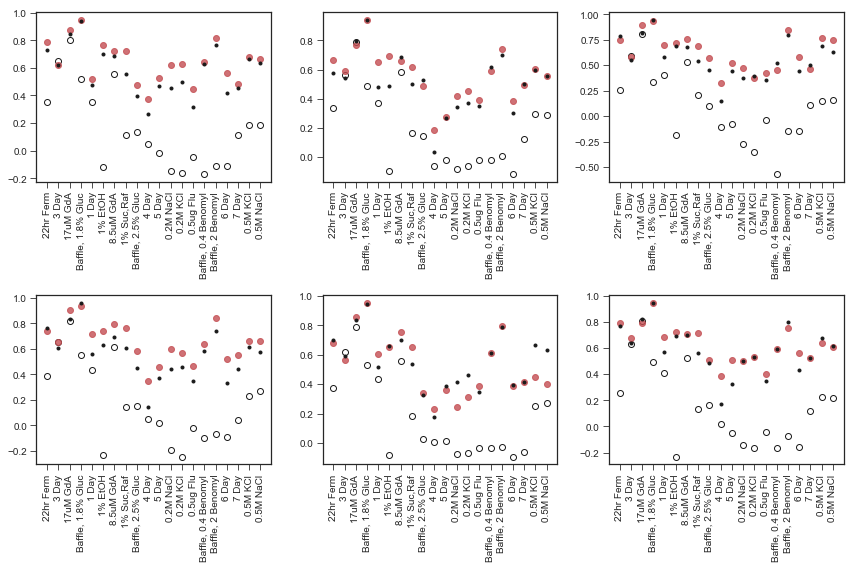

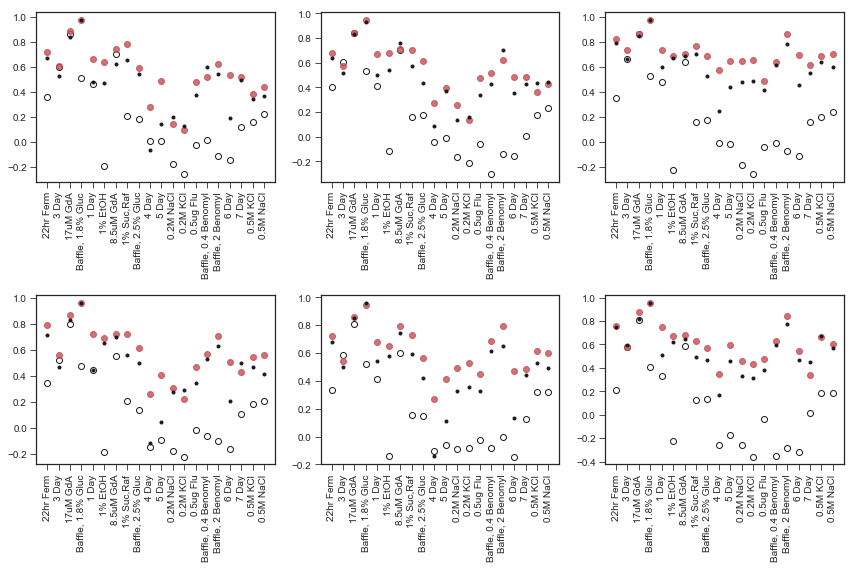

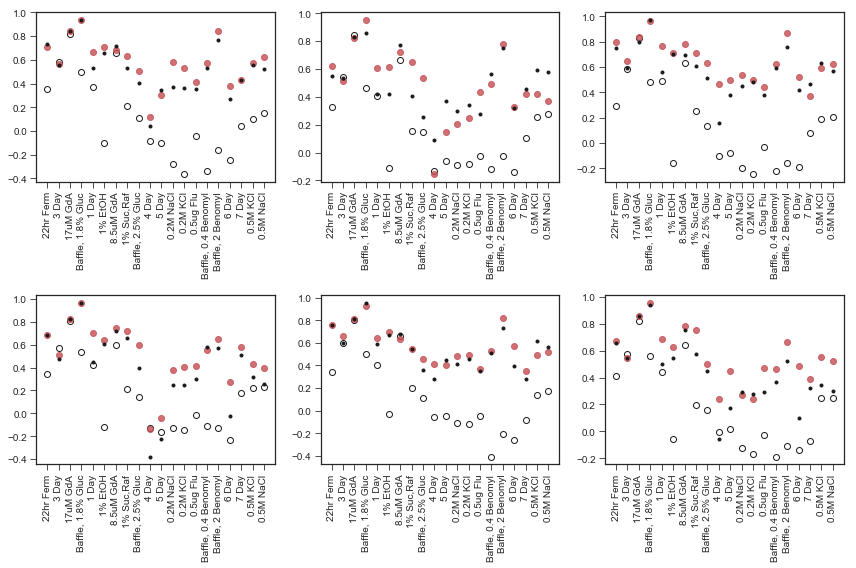

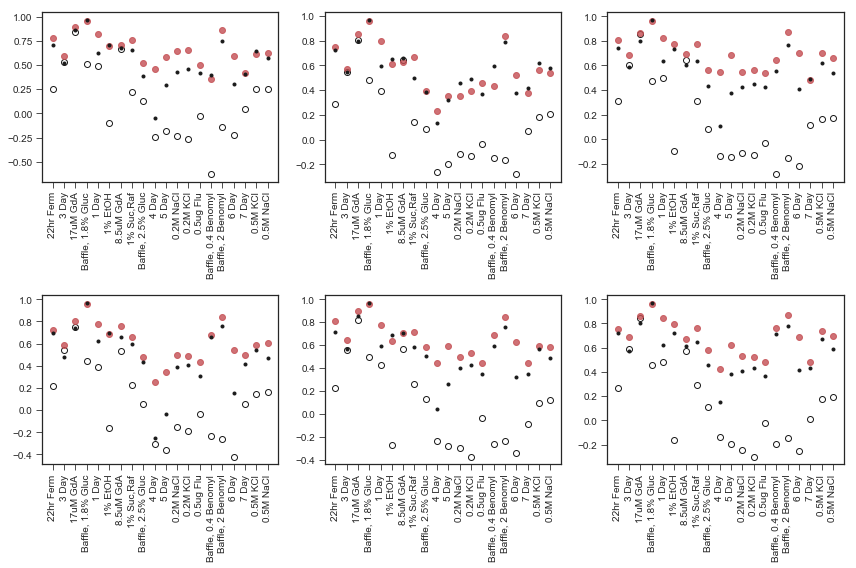

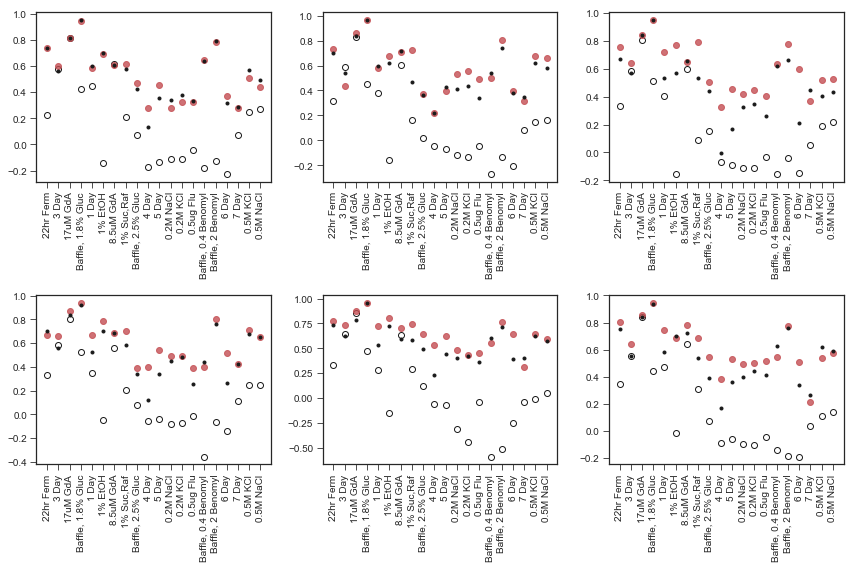

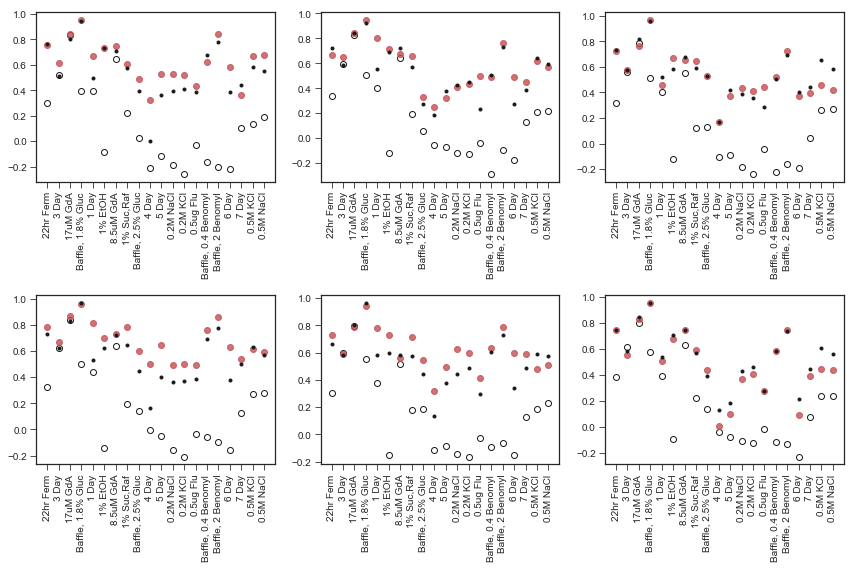

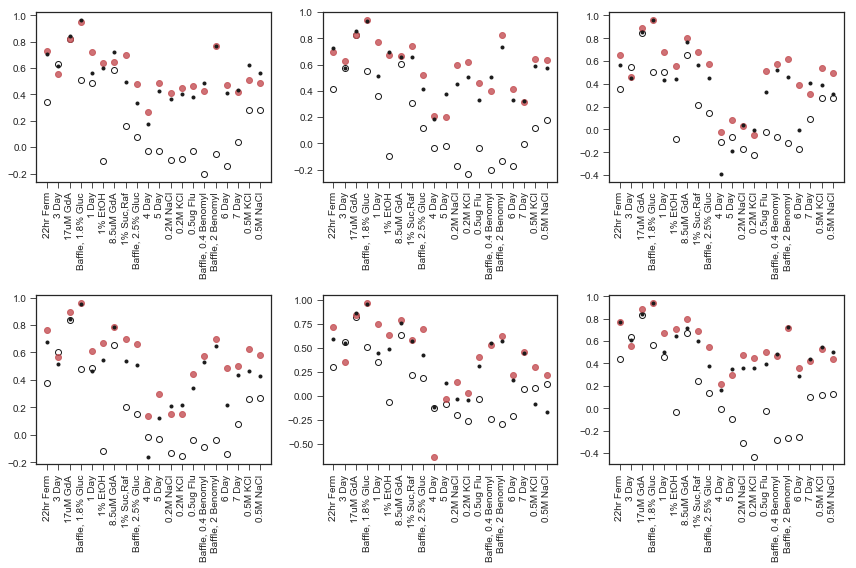

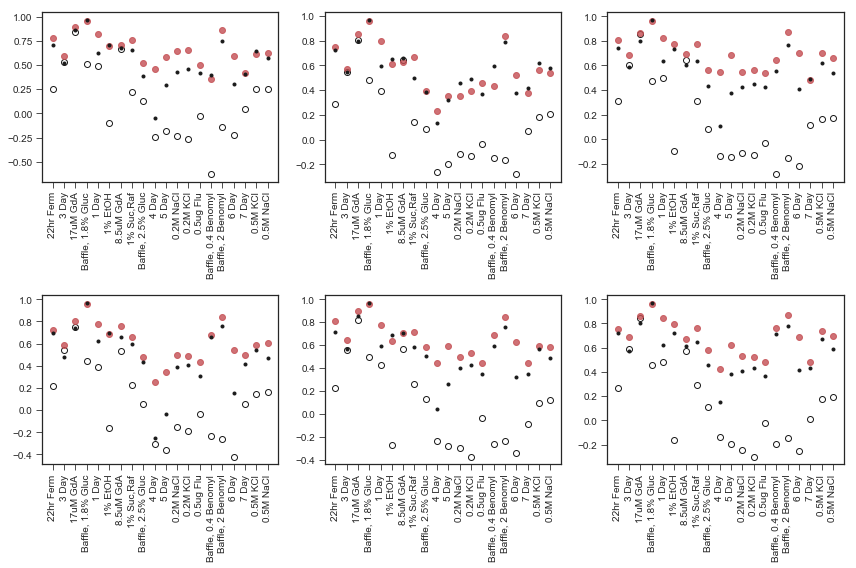

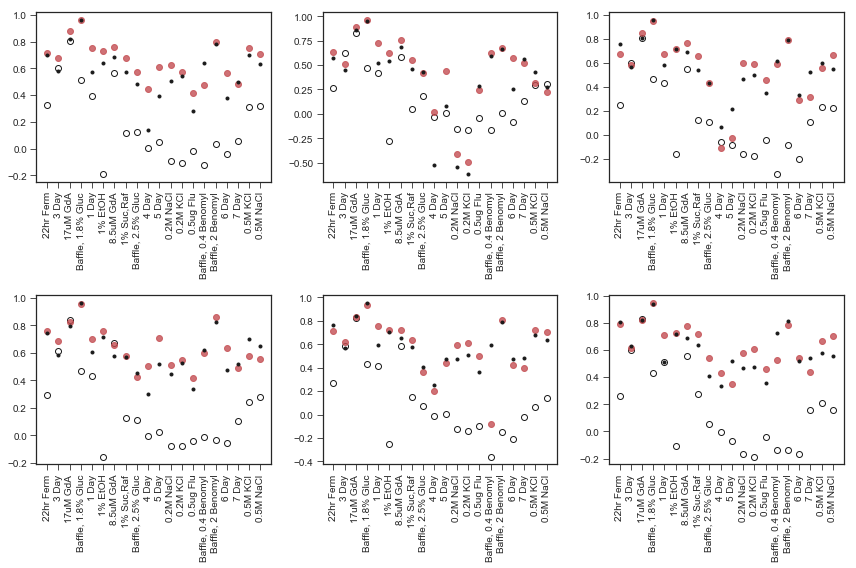

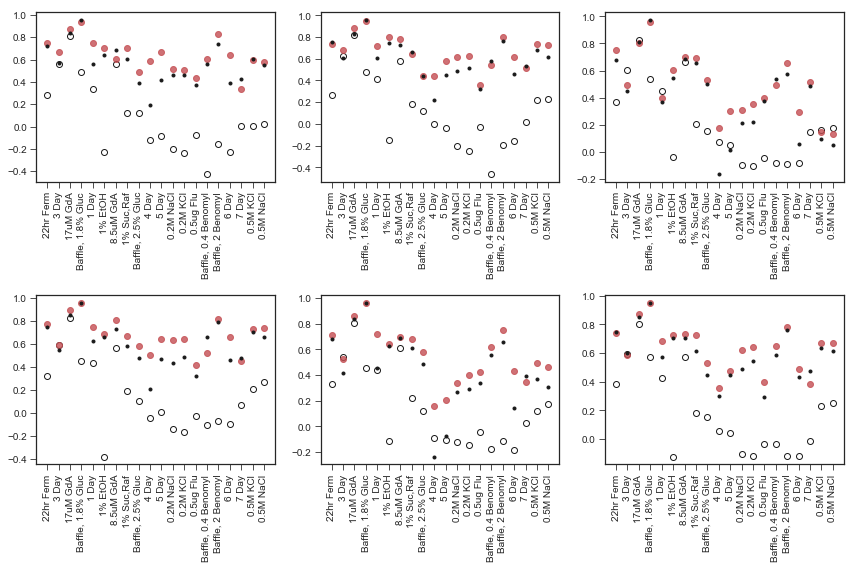

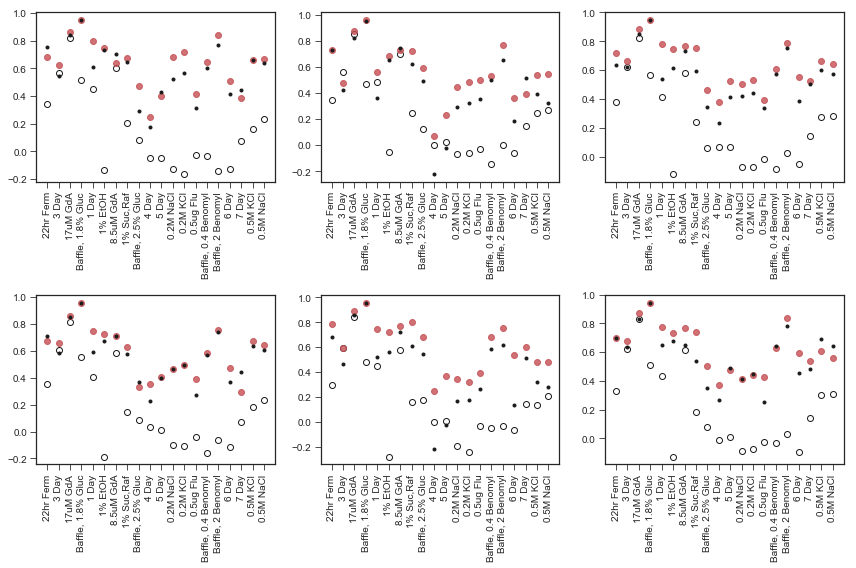

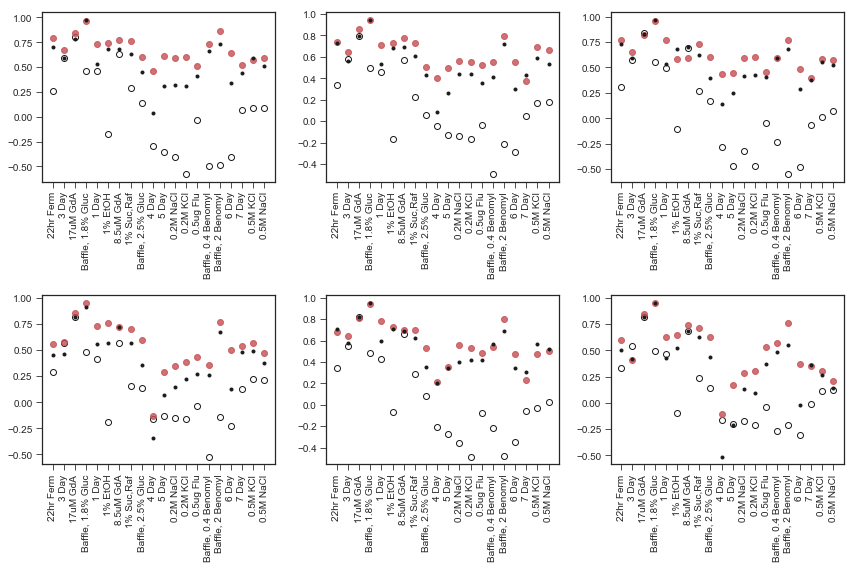

In [118]:
for m,(max_train,max_test) in enumerate(param_list):
    plt.figure(figsize=(4*np.ceil(n_trials/2),4*2))
    
#     ns_fits[f'{(max_train,max_test)}'] = {}
#     s_fits[f'{(max_train,max_test)}'] = {}
    for i in range(n_trials):
        ax = plt.subplot(2,np.ceil(n_trials/2),i+1)
        model = datasets[f'{(max_train,max_test)}'][i]['CV_best_rank_index']
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][0],'ko',markeredgecolor='k',markerfacecolor='None')
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][model],'ro',alpha=0.8)
        
        plt.plot(ns_fits[f'{(max_train,max_test)}'][i][3],'k.')
        
        plt.xticks(range(len(ns_fits[f'{(max_train,max_test)}'][i][3])),[renamed_conditions[col.replace('_fitness','')] for col in sorted_nonm3_cols[first_nonsubtle:]],rotation=90)
        plt.tight_layout()
        

In [78]:
def SVD_predictions_train_test_weighted(data,train,test,
                                        permuted_mutants=False,permuted_conditions=False,
                                        mse=False,by_condition=False,by_mutant=False,error=None,likelihood=False,
                                        weighted_by_type=True,types=None):
    
    """ 
    Bi-cross validation using multiple folds of data matrix. 

    Method from Owen and Perry 2009.

    For each fold, we have the following data matrix:

                        "new conditions"  "old conditions"
    "new mutants"              A                  B
    "old mutants"              C                  D

    We first perform SVD on the D sub-matrix (using only old mutants and old conditions).
    For every pseudo inverse rank k approximation of D (denoted by D_k^+), we matrix multiply B * D_k^+ * C which gives the best estimate for A from the D_k approximation.

    We then evaluate prediction ability use the residual (eqn 3.3 from Owen and Perry 2009):

        A - B * D_k^+ * C 

    """

    train_c = train[0]
    train_m = train[1]

    test_c = test[0]
    test_m = test[1]

    this_data = data
    
    assert len(train_m) + len(test_m) == this_data.shape[0]
    assert len(train_c) + len(test_c) == this_data.shape[1]

    max_rank = min([len(train_c),len(train_m)])

    fits_by_condition = []
    fits_by_mutant = []
    mean_fits =[]

    if permuted_mutants and permuted_conditions:
        this_data = copy.copy(data)
        this_data[train_m,train_c] = np.random.permutation(this_data[train_m,train_c].ravel()).reshape(len(train_m),len(train_c))
        subset = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].ravel()

    elif permuted_mutants:
        this_data = copy.copy(data)
        for mut in train_m:
            this_data[mut,train_c] = np.random.permutation(this_data[mut,train_c])

    elif permuted_conditions:

        this_data = np.swapaxes(copy.copy(data),0,1)
        for cond in train_c:
            this_data[cond,train_m] = np.random.permutation(this_data[cond,train_m])
        this_data = np.swapaxes(this_data,0,1)

    else:
        this_data = copy.copy(data)
        
    if weighted_by_type:
        train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
        test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = np.multiply(all_inv_count,this_data)
    else:
        train_count = np.ones(this_data[train_m,:].shape)
        train_inv_count = np.ones(this_data[train_m,:].shape)
        test_count = np.ones(this_data[test_m,:].shape)
        test_inv_count = np.ones(this_data[test_m,:].shape)
        
        order = np.argsort(np.concatenate((train_m,test_m)))
        
        all_count = np.concatenate((train_count,test_count))[order]
        all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]
        
        weighted_data = copy.copy(this_data)
        
    both_old = weighted_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))
    both_old_unweighted = this_data[np.repeat(train_m,len(train_c)),np.tile(train_c,len(train_m))].reshape(len(train_m),len(train_c))

    U2, s2, V2 = np.linalg.svd(both_old)
    
    mut_new = weighted_data[np.repeat(test_m,len(train_c)),np.tile(train_c,len(test_m))].reshape(len(test_m),len(train_c))  
    cond_new = weighted_data[np.repeat(train_m,len(test_c)),np.tile(test_c,len(train_m))].reshape(len(train_m),len(test_c))
    both_new = weighted_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))
    
    both_new_unweighted = this_data[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    if likelihood:
        both_new_error = error[np.repeat(test_m,len(test_c)),np.tile(test_c,len(test_m))].reshape(len(test_m),len(test_c))

    mean_mutant_prediction = np.repeat(np.mean(mut_new,axis=1),len(test_c)).reshape(len(test_m),len(test_c))

    if mse:
        mean_fits = np.sum(np.square(both_new-mean_mutant_prediction))
    elif likelihood:
        mean_fits = log_likelihood(mean_mutant_prediction,both_new,both_new_error)
    else: 
        mean_fits = tools.var_explained(both_new,mean_mutant_prediction)[0]

    mean_fits_by_condition = []

    if by_condition:
        for k in range(len(test_c)):
            if mse:
                mean_fits_by_condition.append(np.sum(np.square(both_new[:,k]-mean_mutant_prediction[:,k])))
            elif likelihood:
                mean_fits_by_condition.append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
            else:
                mean_fits_by_condition.append(tools.var_explained(both_new[:,k],mean_mutant_prediction[:,k])[0])


    fit_by_rank = []
    guesses = []
    dhats = []
    for rank in range(1,max_rank+1):

        new_s = np.asarray(list(s2[:rank]) + list(np.zeros(s2[rank:].shape)))
        S2 = np.zeros((U2.shape[0],V2.shape[0]))
        S2[:min([U2.shape[0],V2.shape[0]]),:min([U2.shape[0],V2.shape[0]])] = np.diag(new_s)

        D_hat = np.dot(U2[:,:rank],np.dot(S2,V2)[:rank,:])
        A_hat = test_count[:,:len(test_c)]*np.dot(mut_new,np.dot(np.linalg.pinv(D_hat),cond_new))

        dhats.append(D_hat)

        guesses.append(A_hat)
        if mse:
            fit_by_rank.append(np.sum(np.square(both_new_unweighted-A_hat)))

        else:
            fit_by_rank.append(tools.var_explained(both_new_unweighted,A_hat)[0])

        fits_by_condition.append([])
        fits_by_mutant.append([])

        if by_condition:
            for k in range(len(test_c)):
                if mse:
                    fits_by_condition[rank-1].append(np.sum(np.square(both_new[:,k]-A_hat[:,k])))
                elif likelihood:
                    fits_by_condition[rank-1].append(log_likelihood(mean_mutant_prediction[:,k],both_new[:,k],both_new_error[:,k]))
                else:
                    fits_by_condition[rank-1].append(tools.var_explained(both_new_unweighted[:,k],A_hat[:,k])[0])
        if by_mutant: 
            for j in range(len(test_m)):
                if mse:
                    fits_by_mutant[rank-1].append(np.sum(np.square(both_new[j,:]-A_hat[j,:])))
                elif likelihood:
                    fits_by_mutant[rank-1].append(log_likelihood(mean_mutant_prediction[j,:],both_new[j,:],both_new_error[j,:]))
                else:
                    fits_by_mutant[rank-1].append(tools.var_explained(both_new_unweighted[j,:],A_hat[j,:])[0])

        
    return fit_by_rank, fits_by_condition, fits_by_mutant, mean_fits, mean_fits_by_condition, guesses, dhats, both_old

In [59]:
def var_explained_weighted_by_type(data,model,types,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):

    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])

    ss_res = np.sum((data-model)**2/like_type_counts)
    ss_tot = np.sum((data-np.mean(data))**2/like_type_counts)

    return 1 - ss_res/ss_tot, ss_res, ss_tot

In [15]:
def count_matrix(types,data,exceptions={'adaptive_other':1,'Diploid_adaptive':1}):
    
    counts = np.unique(np.asarray(types),return_counts=True)

    like_type_count_dict = {mut_type:count for mut_type,count in zip(*counts)}

    like_type_counts = [like_type_count_dict[mut_type] if mut_type not in exceptions.keys() else exceptions[mut_type] for mut_type in types]
    
    inv_like_type_counts = np.reciprocal(like_type_counts,dtype=np.float)

    if len(data.shape) > 1:
        like_type_counts = np.repeat(like_type_counts,data.shape[1]).reshape(len(like_type_counts),data.shape[1])
        inv_like_type_counts = np.repeat(inv_like_type_counts,data.shape[1]).reshape(len(inv_like_type_counts),data.shape[1])
    
    return like_type_counts,inv_like_type_counts

In [16]:
the_data = this_data[this_data['barcode'].isin(training_bcs)]
types = the_data['mutation_type'].values
the_data = the_data[sorted_m3_cols]

counts,inv_counts = count_matrix(types,the_data)

weighted_data = np.multiply(the_data,inv_counts)


In [79]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')



train_cols = list(sorted_m3_cols) + list(sorted_nonm3_cols[:first_nonsubtle])
test_cols = list(sorted_nonm3_cols[first_nonsubtle:])

fitness_cols = train_cols + test_cols

fitness = this_data[fitness_cols].values

n_mutants = fitness.shape[0]
n_conditions = fitness.shape[1]

train_conditions = train_cols
train_locs = np.where(np.isin(fitness_cols,train_conditions))[0]

test_conditions = test_cols
test_locs = np.where(np.isin(fitness_cols,test_conditions))[0]

all_locs = sorted(list(train_locs)+list(test_locs))

used_mutants = [bc for bc in this_data['barcode'].values if bc in (list(training_bcs) + list(testing_bcs))]

all_mut_locs =sorted(list(np.where(np.isin(this_data['barcode'].values,used_mutants))[0]))

this_fitness = fitness[all_mut_locs,:][:,all_locs]
new_train_locs = np.where(np.isin(all_locs,train_locs))[0]
new_test_locs = np.where(np.isin(all_locs,test_locs))[0]  

train = [new_train_locs,np.where(np.isin(used_mutants,training_bcs))[0]]
test = [new_test_locs,np.where(np.isin(used_mutants,testing_bcs))[0]]

train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(used_mutants)]
types = this_data['mutation_type'].values
# this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values
print(this_fitness.shape)

a = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=False,types=types)
b = tools.SVD_predictions_train_test(this_fitness,train,test)
c = SVD_predictions_train_test_weighted(this_fitness,train,test,weighted_by_type=True,types=types)



(115, 45)


In [81]:
a

([0.48594878221694315,
  0.6651793019178571,
  0.6542309181041621,
  0.6385183520137927,
  0.621796896186032,
  0.6550659429662444,
  0.6824422662472747,
  0.6931812469335105,
  0.7024496489299155,
  0.7026157227584926,
  0.6957771714716079,
  0.6959425314709052,
  0.6723319157437555,
  0.6583595861365309,
  0.6462173352389644,
  0.6217320300761602,
  0.6181051779667596,
  0.641109716033226,
  0.6318901692794016,
  0.5318100419596565,
  0.49065596997370364,
  0.49490684506902816,
  0.49053574611505535,
  0.3208216779077344,
  0.3049429714833386],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 -0.4095150152998155,
 [],
 [array([[ 0.910285  ,  1.15000434,  0.69652404, ..., -0.53576547,
          -2.121309  , -2.25348513],
         [ 0.7

In [82]:
c

([0.19527701182841484,
  0.6696562843544978,
  0.7161874472374796,
  0.7199486905477857,
  0.6916200258199743,
  0.7000613095588939,
  0.7011721228390948,
  0.718884333434109,
  0.7350051829952078,
  0.7368271743400794,
  0.7226607813944499,
  0.7230471513760546,
  0.7219251061111961,
  0.7131097850499838,
  0.6798474033421378,
  0.6759022677614608,
  0.6439068842881772,
  0.5838796917477431,
  0.5448344645402791,
  0.5515977700486654,
  0.48921044365112887,
  0.41905478077565417,
  0.2732046744675001,
  0.14611848717885478,
  0.11525166929796249],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 0.020202590783575003,
 [],
 [array([[ 1.25608241,  1.22576268,  0.68342324, ...,  0.02142235,
          -0.49129433, -0.52379639],
         [ 

In [31]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna('columns',how='all')
this_data = this_data.dropna()
this_data = this_data.sort_values('barcode')


train_c = train[0]
train_m = train[1]

test_c = test[0]
test_m = test[1]

this_data = this_data[this_data['barcode'].isin(training_bcs+testing_bcs)]
types = this_data['mutation_type'].values

this_data = this_data[list(sorted_m3_cols)+list(sorted_nonm3_cols)].values

train_count,train_inv_count = count_matrix(types[train_m],this_data[train_m,:])
test_count,test_inv_count = count_matrix(types[test_m],this_data[test_m,:])

order = np.argsort(np.concatenate((train_m,test_m)))

all_count = np.concatenate((train_count,test_count))[order]
all_inv_count = np.concatenate((train_inv_count,test_inv_count))[order]

weighted_data = np.multiply(all_inv_count,this_data)

order = np.argsort(np.concatenate((train_m,test_m)))
        
all_count = np.concatenate((train_count,test_count))[order]

In [37]:
all_count.shape

(115, 45)

In [38]:
train_count.shape

(42, 45)

In [34]:
test_count

array([[10, 10, 10, ..., 10, 10, 10],
       [ 6,  6,  6, ...,  6,  6,  6],
       [ 6,  6,  6, ...,  6,  6,  6],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [10, 10, 10, ..., 10, 10, 10],
       [ 4,  4,  4, ...,  4,  4,  4]])

In [40]:
train_m.shape

(42,)

In [ ]:
test_m